In [115]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(658, 1194, 3)

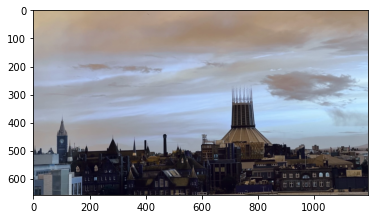

In [116]:
img = cv2.imread('../liverpool_church.jpeg')
plt.imshow(img)
img.shape

(658, 1194, 3)
(658, 1194)


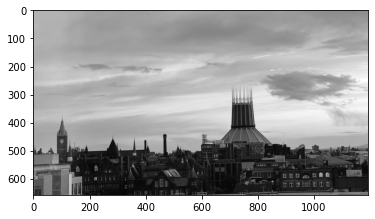

In [136]:
def process_image(image):
    image = cv2.cvtColor(src=image, code=cv2.COLOR_RGB2BGR)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_RGBA2GRAY)
    return image

img_gray = process_image(img)
plt.imshow(img_gray, cmap='gray')
print(img.shape)
print(img_gray.shape)

In [118]:
def zero_padding(image, padding=0):
    # Apply Equal Padding to All Sides
    if padding != 0:
        image_padded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        image_padded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        image_padded = image
    return image_padded

def convolve_2d(image, kernel, padding=0, strides=1, average=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    #We will have the size of the output image same as that of the input image
    output = np.zeros(image.shape)

    #We will pad zeros around the boundaries around the image
    #This padding size maintains the image size
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    #This is padded image (now are all zeros)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    #Fill the padded image with the values of the input image for corresponding pixels
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    #Here the convolution is performed. We have a window to slide over the padded image.
    #From top to bottom
    for row in range(image_row):
        #From left to right
        for col in range(image_col):
            #Convoultion:
            #1. Get the product of the values of the corresponding pixels in both the kelnel and the patch of the padded image
            #2. Sum up all the products to get the output for this specific pixel.
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    return output

In [119]:
def test_zero_padding():
    mock = np.ones((10,10))
    padded = zero_padding(image=mock, padding=1)
    return padded

test_zero_padding()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Image Shape : (658, 1194)
Kernel Shape : (3, 3)
Output Image size : (658, 1194)
(658, 1194)
(658, 1194)


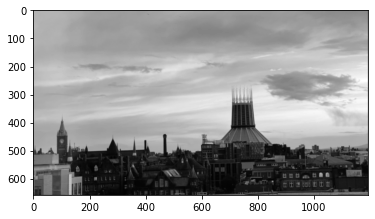

In [137]:
def test_convolve_2d():
    mock_kernel = np.ones((3,3))/9
    img_convolve = convolve_2d(image=img_gray, kernel=mock_kernel, padding=1)
    plt.imshow(img_convolve,  cmap='gray')
    print(img_gray.shape)
    print(img_convolve.shape)

test_convolve_2d()

# Q1

In [138]:
def gaussian_kernel(dimension, sigma):
    x = cv2.getGaussianKernel(dimension, sigma)
    y = cv2.getGaussianKernel(dimension, sigma)
    kernel = x.dot(y.T)
    return kernel

Image Shape : (658, 1194)
Kernel Shape : (5, 5)
Output Image size : (658, 1194)


array([[ 83.44996258, 112.62808731, 119.20075725, ...,  92.59216074,
         87.56398449,  64.95755405],
       [112.63105633, 151.93522103, 160.76183087, ..., 124.94822904,
        118.21637178,  87.72490813],
       [119.21703248, 160.81283315, 170.20650528, ..., 132.49537551,
        125.40185126,  93.0810274 ],
       ...,
       [ 76.37535828, 104.33634337, 111.77505434, ..., 112.41390293,
        106.77946729,  79.50842716],
       [ 71.38501936,  98.08418308, 105.37577872, ..., 114.92479597,
        108.40275895,  80.36541294],
       [ 52.65520531,  72.57803743,  78.06510834, ...,  86.40700774,
         81.18812868,  60.03509388]])

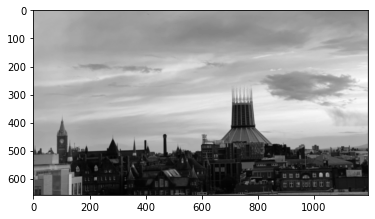

In [139]:
gaussian_kernel_1 = gaussian_kernel(5,1)
gau_image_1 = convolve_2d(image=img_gray, kernel=gaussian_kernel_1, padding=1)
plt.imshow(gau_image_1, cmap='gray')
gau_image_1

Image Shape : (658, 1194)
Kernel Shape : (5, 5)
Output Image size : (658, 1194)


array([[ 70.86738286,  96.57079154, 109.79187336, ...,  85.33431507,
         75.10057852,  55.15583723],
       [ 96.58521036, 131.61235111, 149.6361662 , ..., 116.38059992,
        102.43126265,  75.23800984],
       [109.8343762 , 149.68387773, 170.21425325, ..., 132.61249522,
        116.72039317,  85.73726504],
       ...,
       [ 70.62786722,  97.42603562, 110.64998269, ..., 109.12388345,
         96.37404918,  70.9153087 ],
       [ 61.81707209,  85.4372333 ,  97.06960231, ..., 104.53096302,
         92.03446556,  67.57461293],
       [ 45.16942999,  62.52679054,  71.04376932, ...,  79.62859414,
         69.84417893,  51.14176158]])

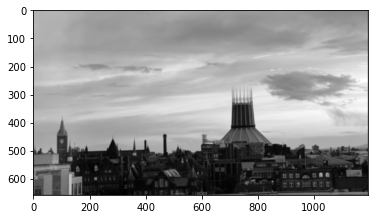

In [143]:
gaussian_kernel_2 = gaussian_kernel(5,1.5)
gau_image_2 = convolve_2d(image=img_gray, kernel=gaussian_kernel_2, padding=1)
plt.imshow(gau_image_2, cmap='gray')
gau_image_2

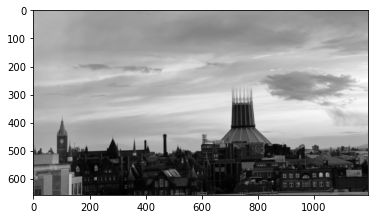

In [141]:
# openCv implement method
image_gau_1 = cv2.GaussianBlur(img_gray, (5,5), sigmaX=1)
plt.imshow(image_gau_1, cmap='gray')

array([[170, 170, 170, ..., 133, 133, 133],
       [170, 170, 170, ..., 133, 133, 133],
       [170, 170, 170, ..., 133, 133, 133],
       ...,
       [101,  99,  94, ..., 112, 113, 113],
       [101,  99,  94, ..., 107, 108, 108],
       [101,  99,  93, ..., 105, 106, 106]], dtype=uint8)

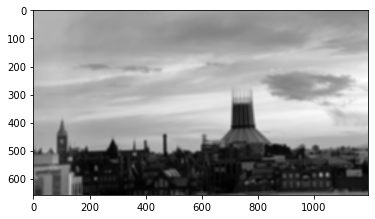

In [145]:
image_gau_2 = cv2.GaussianBlur(img_gray, (11,11), sigmaX=100)
plt.imshow(image_gau_2, cmap='gray')
image_gau_2

# Q2

Image Shape : (658, 1194)
Kernel Shape : (3, 3)
Output Image size : (658, 1194)


array([[105.25 ,  63.875,  63.75 , ...,  49.5  ,  49.5  ,  82.5  ],
       [ 63.875,   0.125,   0.   , ...,  -0.125,  -0.25 ,  49.25 ],
       [ 63.75 ,  -0.125,  -0.25 , ...,  -0.5  ,   0.5  ,  50.125],
       ...,
       [ 41.   ,   0.   ,  -0.75 , ...,  13.   ,  10.875,  55.375],
       [ 36.25 ,  -0.5  ,   0.625, ...,   0.75 ,   0.   ,  46.375],
       [ 64.75 ,  40.875,  44.125, ...,  45.875,  44.25 ,  75.125]])

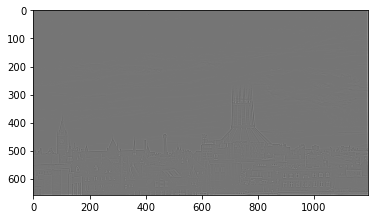

In [146]:
laplacian_1 = -np.ones((3,3))*(1/8)
laplacian_1[1,1] = 1
laplacian_img_1 = convolve_2d(image=img_gray, kernel=laplacian_1, padding=1)
plt.imshow(laplacian_img_1, cmap='gray')
laplacian_img_1

Image Shape : (658, 1194)
Kernel Shape : (3, 3)
Output Image size : (658, 1194)


array([[105.25 ,  63.875,  63.75 , ...,  49.5  ,  49.5  ,  82.5  ],
       [ 63.875,   0.125,   0.   , ...,  -0.125,  -0.25 ,  49.25 ],
       [ 63.75 ,  -0.125,  -0.25 , ...,  -0.5  ,   0.5  ,  50.125],
       ...,
       [ 41.   ,   0.   ,  -0.75 , ...,  13.   ,  10.875,  55.375],
       [ 36.25 ,  -0.5  ,   0.625, ...,   0.75 ,   0.   ,  46.375],
       [ 64.75 ,  40.875,  44.125, ...,  45.875,  44.25 ,  75.125]])

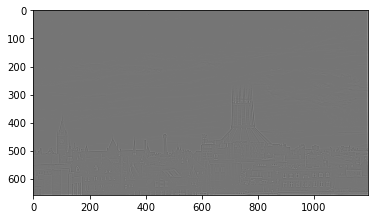

In [147]:
laplacian_2 = laplacian_1 * 8
laplacian_img_2 = convolve_2d(image=img_gray, kernel=laplacian_1, padding=1)
plt.imshow(laplacian_img_2, cmap='gray')
laplacian_img_2

# Q3

Image Shape : (5, 5)
Kernel Shape : (1, 2)
Output Image size : (5, 5)
Image Shape : (658, 1194)
Kernel Shape : (5, 5)
Output Image size : (658, 1194)
[[ 0.0136652   0.00698868 -0.00698868 -0.0136652   0.        ]
 [ 0.02661618  0.01361208 -0.01361208 -0.02661618  0.        ]
 [ 0.03323959  0.01699944 -0.01699944 -0.03323959  0.        ]
 [ 0.02661618  0.01361208 -0.01361208 -0.02661618  0.        ]
 [ 0.0136652   0.00698868 -0.00698868 -0.0136652   0.        ]]
[[-1  1]]


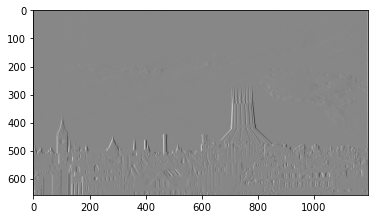

In [155]:
#Gaussian mask: size: 5x5, sigma = 1.5
g_kernel = gaussian_kernel(5, 1.5)

#Gaussian derivative in the x direction
der_x = np.array([-1,1])
der_x.shape = [1,2] #To make it as the 2D array
gdmask_x = convolve_2d(g_kernel, der_x)
gdmask_img1 = convolve_2d(img_gray, gdmask_x, average=False)
plt.imshow(gdmask_img1, cmap='gray')
print(gdmask_x)
print(der_x)

Image Shape : (5, 5)
Kernel Shape : (2, 1)
Output Image size : (5, 5)
Image Shape : (658, 1194)
Kernel Shape : (5, 5)
Output Image size : (658, 1194)
[[-1]
 [ 1]]
[[ 0.0136652   0.02661618  0.03323959  0.02661618  0.0136652 ]
 [ 0.00698868  0.01361208  0.01699944  0.01361208  0.00698868]
 [-0.00698868 -0.01361208 -0.01699944 -0.01361208 -0.00698868]
 [-0.0136652  -0.02661618 -0.03323959 -0.02661618 -0.0136652 ]
 [ 0.          0.          0.          0.          0.        ]]


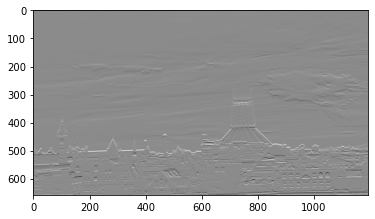

In [156]:
#Gaussian derivative in the y direction
der_y = np.transpose(der_x)
gdmask_y = convolve_2d(g_kernel, der_y)
gdmask_img2 = convolve_2d(img_gray, gdmask_y, average=False)
plt.imshow(gdmask_img2, cmap='gray')
print(der_y)
print(gdmask_y)

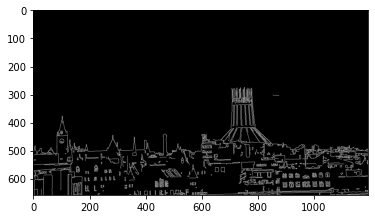

In [149]:
edges = cv2.Canny(img_gray,100,200)
plt.imshow(edges, cmap='gray')